# 01. Import libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os

# Part 1

# 02. Import new customer data

In [2]:
# Assigning variable to folder path

path = r'C:\Users\Amy Yip\Desktop\Career Foundry Data Analytics\Achievement 4 Python\05-02-2022 Instacart Basket Analysis'

In [3]:
# Import new customer data

df_cust = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'customers.csv'), index_col = False)

In [4]:
df_cust.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [5]:
df_cust.tail()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
206204,168073,Lisa,Case,Female,North Carolina,44,4/1/2020,1,married,148828
206205,49635,Jeremy,Robbins,Male,Hawaii,62,4/1/2020,3,married,168639
206206,135902,Doris,Richmond,Female,Missouri,66,4/1/2020,2,married,53374
206207,81095,Rose,Rollins,Female,California,27,4/1/2020,1,married,99799
206208,80148,Cynthia,Noble,Female,New York,55,4/1/2020,1,married,57095


In [6]:
df_cust.shape

(206209, 10)

In [7]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       206209 non-null  int64 
 1   First Name    194950 non-null  object
 2   Surnam        206209 non-null  object
 3   Gender        206209 non-null  object
 4   STATE         206209 non-null  object
 5   Age           206209 non-null  int64 
 6   date_joined   206209 non-null  object
 7   n_dependants  206209 non-null  int64 
 8   fam_status    206209 non-null  object
 9   income        206209 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 15.7+ MB


In [8]:
df_cust.dtypes

user_id          int64
First Name      object
Surnam          object
Gender          object
STATE           object
Age              int64
date_joined     object
n_dependants     int64
fam_status      object
income           int64
dtype: object

In [9]:
df_cust.columns

Index(['user_id', 'First Name', 'Surnam', 'Gender', 'STATE', 'Age',
       'date_joined', 'n_dependants', 'fam_status', 'income'],
      dtype='object')

In [10]:
df_cust.describe()

,user_id,Age,n_dependants,income
count,206209.000000,206209.000000,206209.000000,206209.000000
mean,103105.000000,49.501646,1.499823,94632.852548
std,59527.555167,18.480962,1.118433,42473.786988
min,1.000000,18.000000,0.000000,25903.000000
25%,51553.000000,33.000000,0.000000,59874.000000
50%,103105.000000,49.000000,1.000000,93547.000000
75%,154657.000000,66.000000,3.000000,124244.000000
max,206209.000000,81.000000,3.000000,593901.000000


# 03. Wrangle data

* Rename columns
* Dropping columns
* Changing data types
* Transposing data

### Rename columns

In [11]:
# Rename columns for consistency: First Name, Surnam, Gender, STATE, Age

df_cust.rename(columns = {'First Name':'first_name', 'Surnam':'surname', 'Gender':'gender', 'STATE':'state', 'Age':'age'}, inplace = True)

In [12]:
df_cust.head()

,user_id,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


### Dropping columns

Dropping first_name and surname columns as it is not required in the analysis and to reduce memory usage.

In [13]:
df_cust = df_cust.drop(columns = ['first_name', 'surname'])

In [14]:
df_cust.head()

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income
0,26711,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Female,Maryland,26,1/1/2017,1,married,40374


In [15]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       206209 non-null  int64 
 1   gender        206209 non-null  object
 2   state         206209 non-null  object
 3   age           206209 non-null  int64 
 4   date_joined   206209 non-null  object
 5   n_dependants  206209 non-null  int64 
 6   fam_status    206209 non-null  object
 7   income        206209 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 12.6+ MB


### Changing data types

In [16]:
# Changing user_id datatype from integer to string so that column will be ignored when calculating descriptive statistics

df_cust['user_id'] = df_cust['user_id'].astype('str')

In [17]:
df_cust['user_id'].dtype

dtype('O')

### Transposing data

There is no need for transposing data as the dataframe is already in long format.

# 04. Data Quality and Consistency Checks

* (i) Finding and addressing missing values
* (ii) Finding and addressing mixed data types (in a column)
* (iii) Finding and addressing duplicate records

### (i) Check missing values

https://www.geeksforgeeks.org/python-pandas-isnull-and-notnull/

https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe

DataFrame.isna() - Detect missing values.

DataFrame.isnull() - is an alias for DataFrame.isna. Detect missing values.

In [18]:
# Check missing values per columns

df_cust.isna().sum()

user_id         0
gender          0
state           0
age             0
date_joined     0
n_dependants    0
fam_status      0
income          0
dtype: int64

There are no missing data in the dataframe.

In [19]:
df_cust.shape

(206209, 8)

### (ii) Checking mixed data types

In [20]:
# Checking whether dataframe contains any mixed-type columns

for col in df_cust.columns.tolist():
  weird = (df_cust[[col]].applymap(type) != df_cust[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_cust[weird]) > 0:
    print (col)

There are no mixed-type columns in the dataframe.

In [21]:
df_cust.shape

(206209, 8)

### (iii) Checking for duplicates

In [22]:
# Identify full duplicates within the dataframe:

df_dups = df_cust[df_cust.duplicated()]

In [23]:
# Display all duplicate rows within the dataframe

df_dups

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income


There are no full duplicate rows within the dataframe.

In [24]:
df_cust.shape

(206209, 8)

# 05. Combine customer data with the rest of prepared Instacart data

In [25]:
# Import orders_products_merged dataset

df_ords_prods_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged4.8.pkl'))

In [26]:
# Display all columns

pd.options.display.max_columns = None

In [27]:
df_ords_prods_merged.head()

,order_id,user_id,order_numbers_users_made,orders_day_of_week,order_hour_of_day,days_since_prior_order,prior_orders_made,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spending,spending_flag,median_days_since_prior_order,order_frequency_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


In [28]:
df_ords_prods_merged.shape

(32404859, 23)

In [29]:
# Memory usage of df_ords_prods_merged dataframe

df_ords_prods_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 23 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   order_id                       int64  
 1   user_id                        int64  
 2   order_numbers_users_made       int64  
 3   orders_day_of_week             int64  
 4   order_hour_of_day              int64  
 5   days_since_prior_order         float64
 6   prior_orders_made              bool   
 7   product_id                     int64  
 8   add_to_cart_order              int64  
 9   reordered                      int64  
 10  product_name                   object 
 11  aisle_id                       int64  
 12  department_id                  int64  
 13  prices                         float64
 14  price_range_loc                object 
 15  busiest_days                   object 
 16  busiest_period_of_day          object 
 17  max_order                      int64  
 18  

In [30]:
# Memory usage of df_cust2 dataframe

df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       206209 non-null  object
 1   gender        206209 non-null  object
 2   state         206209 non-null  object
 3   age           206209 non-null  int64 
 4   date_joined   206209 non-null  object
 5   n_dependants  206209 non-null  int64 
 6   fam_status    206209 non-null  object
 7   income        206209 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 12.6+ MB


In [31]:
df_ords_prods_merged.head()

,order_id,user_id,order_numbers_users_made,orders_day_of_week,order_hour_of_day,days_since_prior_order,prior_orders_made,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spending,spending_flag,median_days_since_prior_order,order_frequency_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


###  Reducing memory usage in dataframes by changing data types in columns
https://www.analyticsvidhya.com/blog/2021/04/how-to-reduce-memory-usage-in-python-pandas/#:~:text=Another%20way%20to%20reduce%20memory,are%207%20and%2073%20respectively.

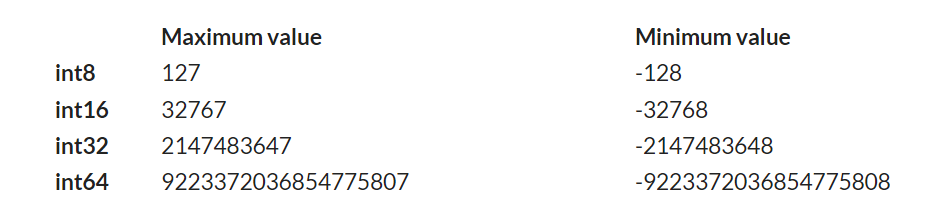

Methodology:
* Check maximum value to see the range of data within each columns.
* Use the maximum value to determine minimum datatype size to convert the datatype to.
* Converting datatype to reduce memory size.

In [32]:
# Changing to category data type can reduce the data usage considerably

df_cust[['gender', 'state', 'fam_status']] = df_cust[['gender', 'state', 'fam_status']].astype('category')

In [33]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   user_id       206209 non-null  object  
 1   gender        206209 non-null  category
 2   state         206209 non-null  category
 3   age           206209 non-null  int64   
 4   date_joined   206209 non-null  object  
 5   n_dependants  206209 non-null  int64   
 6   fam_status    206209 non-null  category
 7   income        206209 non-null  int64   
dtypes: category(3), int64(3), object(2)
memory usage: 8.5+ MB


The memory usage for df_cust dataframe has been reduced from 12.6+ MB down to 8.5+ MB.

In [34]:
# Changing user_id datatype from integer to string so that column will be ignored when calculating descriptive statistics
# Also user_id datatype needs to be in the same datatype as the customer dataframe so that we can join both dataframes.

df_ords_prods_merged['user_id'] = df_ords_prods_merged['user_id'].astype('str')

In [35]:
df_ords_prods_merged['order_id'] = df_ords_prods_merged['order_id'].astype('str')

In [36]:
# Check max value to see range of data within the 'order_numbers_users_made' column

df_ords_prods_merged['order_numbers_users_made'].max()

99

In [37]:
# Converting datatype

df_ords_prods_merged['order_numbers_users_made'] = df_ords_prods_merged['order_numbers_users_made'].astype('int8')

In [38]:
# Check max value to see range of data within the 'orders_day_of_week' column

df_ords_prods_merged['orders_day_of_week'].max()

6

In [39]:
# Converting datatype

df_ords_prods_merged['orders_day_of_week'] = df_ords_prods_merged['orders_day_of_week'].astype('int8')

In [40]:
# Check max value to see range of data within the 'order_hour_of_day' column

df_ords_prods_merged['order_hour_of_day'].max()

23

In [41]:
# Converting datatype

df_ords_prods_merged['order_hour_of_day'] = df_ords_prods_merged['order_hour_of_day'].astype('int8')

In [42]:
# Check max value to see range of data within the 'add_to_cart_order' column

df_ords_prods_merged['add_to_cart_order'].max()

145

In [43]:
df_ords_prods_merged['add_to_cart_order'] = df_ords_prods_merged['add_to_cart_order'].astype('int16')

In [44]:
# Check max value to see range of data within the 'reordered' column

df_ords_prods_merged['reordered'].max()

1

In [45]:
df_ords_prods_merged['reordered'] = df_ords_prods_merged['reordered'].astype('int8')

In [46]:
# Check max value to see range of data within the 'max_order' column

df_ords_prods_merged['max_order'].max()

99

In [47]:
df_ords_prods_merged['max_order'] = df_ords_prods_merged['max_order'].astype('int8')

In [48]:
# Convert flag columns to category datatype to store data more efficiently. 

df_ords_prods_merged[['price_range_loc', 'busiest_days', 'busiest_period_of_day', 'loyalty_flag', 'spending_flag', 'order_frequency_flag']] = df_ords_prods_merged[['price_range_loc', 'busiest_days', 'busiest_period_of_day', 'loyalty_flag', 'spending_flag', 'order_frequency_flag']].astype('category')

In [49]:
df_ords_prods_merged['product_name'] = df_ords_prods_merged['product_name'].astype('category')

In [50]:
df_ords_prods_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 23 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       object  
 1   user_id                        object  
 2   order_numbers_users_made       int8    
 3   orders_day_of_week             int8    
 4   order_hour_of_day              int8    
 5   days_since_prior_order         float64 
 6   prior_orders_made              bool    
 7   product_id                     int64   
 8   add_to_cart_order              int16   
 9   reordered                      int8    
 10  product_name                   category
 11  aisle_id                       int64   
 12  department_id                  int64   
 13  prices                         float64 
 14  price_range_loc                category
 15  busiest_days                   category
 16  busiest_period_of_day          category
 17  max_order                

The memory usage for df_ords_prods_merged dataframe has been reduced from 5.6+ GB down to 3.0+ GB.

In [51]:
# Combine customer dataframe with orders_products_merged dataframe (using outer join to see if there are any mismatch data)

df_ords_prods_all = df_ords_prods_merged.merge(df_cust, on = 'user_id', indicator = True, how = 'outer')

In [52]:
df_ords_prods_all['_merge'].value_counts()

both          32404859
left_only            0
right_only           0
Name: _merge, dtype: int64

There are 32,404,859 of data that exists in both dataframes. No data mismatch exists.

In [53]:
df_ords_prods_all.head()

,order_id,user_id,order_numbers_users_made,orders_day_of_week,order_hour_of_day,days_since_prior_order,prior_orders_made,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spending,spending_flag,median_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both


In [54]:
# Drop '_merge' column as we have inner joined the dataframe, meaning the result for all rows in this column would be the same.

df_ords_prods_all = df_ords_prods_all.drop(columns = ['_merge'])

In [55]:
df_ords_prods_all.head()

,order_id,user_id,order_numbers_users_made,orders_day_of_week,order_hour_of_day,days_since_prior_order,prior_orders_made,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spending,spending_flag,median_days_since_prior_order,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [56]:
df_ords_prods_all.shape

(32404859, 30)

# 06. Export final dataframe

In [57]:
# Export dataframe

df_ords_prods_all.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_ords_prods_all_v3.pkl'))